Import dataset

In [ ]:
# Fetch mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

Prepare data

In [ ]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=1 / 7, shuffle=True)

# Add bias term to XTrain and XTest
XTrain_bias = np.hstack((np.ones((XTrain.shape[0], 1)), XTrain))
XTest_bias = np.hstack((np.ones((XTest.shape[0], 1)), XTest))

# Convert labels to one-hot encoding
num_classes = len(np.unique(yTrain))
yTrain_onehot = np.eye(num_classes)[yTrain]

Train model

In [ ]:
# Linear Regression using Least Squares Method
def least_squares_regression(X, y):
    # (X^T * X)^-1 * X^T * y
    return np.linalg.pinv(X.T @ X) @ X.T @ y

# Train the model
theta = least_squares_regression(XTrain_bias, yTrain_onehot)

Test Model

Test Accuracy: 85.47%


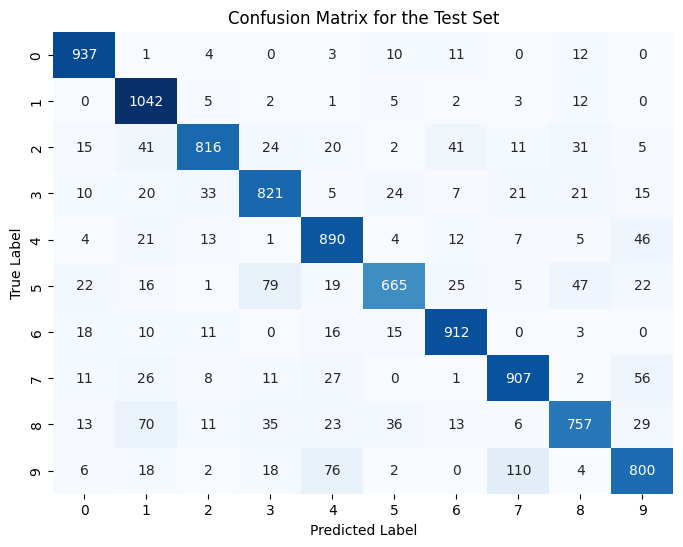


+-------+----------+--------------------+--------------------+
| Digit | Accuracy | Sensitivity (TPR)  | Selectivity (TNR)  |
+-------+----------+--------------------+--------------------+
|   0   |  0.986   | 0.9580777096114519 | 0.9890268233207714 |
|   1   |  0.9747  | 0.9720149253731343 | 0.9750224014336918 |
|   2   |  0.9722  | 0.8111332007952287 | 0.9902156993551257 |
|   3   |  0.9674  | 0.8403275332650972 | 0.9811592596697329 |
|   4   |  0.9697  | 0.8873379860418744 | 0.9788818495053907 |
|   5   |  0.9666  | 0.7380688124306326 | 0.9892295856687549 |
|   6   |  0.9815  | 0.9258883248730965 | 0.9875762617859124 |
|   7   |  0.9695  | 0.8646329837940896 | 0.9817897441626634 |
|   8   |  0.9627  | 0.7623363544813696 | 0.9847896080826024 |
|   9   |  0.9591  | 0.7722007722007722 | 0.9807005800981704 |
+-------+----------+--------------------+--------------------+
Average Test Set Accuracy: 97.09%


In [ ]:
# Predict function
def predict(X, theta):
    return np.argmax(X @ theta, axis=1)

# Make predictions on the test set
yPred = predict(XTest_bias, theta)

# Calculate accuracy
accuracy = np.mean(yPred == yTest)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the Test Set')
plt.show()

# Display metrics for the entire test set
table_headers = ["Digit", "Accuracy", "Sensitivity (TPR)", "Selectivity (TNR)"]
table_data = []
total_set_acc = 0
for digit in range(10):
    TP = conf_matrix[digit, digit]
    TN = np.sum(np.delete(np.delete(conf_matrix, digit, axis=0), digit, axis=1))
    FP = np.sum(conf_matrix[:, digit]) - TP
    FN = np.sum(conf_matrix[digit, :]) - TP

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    sensitivity = TP / max(TP + FN, 0)
    selectivity = TN / max(TN + FP, 0)
    total_set_acc += accuracy

    table_data.append([digit, accuracy, sensitivity, selectivity])

# Display metrics in a table
print()
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))
print(f"Average Test Set Accuracy: {total_set_acc * 10:.2f}%")

*   The SoftMax regression, Perceptron and Linear Regression are all similar in terms of accuracy, achieving the average accuracy of 97.00% per digit class, and overall acurracy of 85% for the entire test data.
*   Linear Regression has the shortest running time among the three algorithms, taking only several seconsd to execute. This makes it computationally efficient compared to Perceptron and SoftMax regression, which took around 4 and 3 minutes, respectively.
*   Overall, Linear Regression achieves the best balance between accuracy and computational efficiency in this comparison.









*   Linear regression can be computationally efficient, especially for datasets with a large number of features. The closed-form solution for linear regression allows for quick training on large datasets.
*   Linear regression assumption of full-rankness is a weak spot as many datasets features may perhaps be linearly dependent

